<a href="https://colab.research.google.com/github/nesarasr/Optimal-Epidemic-Curing-Policy-using-Genetic-Algorithms/blob/master/GA_Project_plot_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
sns.set()
import math
np.random.seed(0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


--Graph Initialization complete--
Weight of each edge represents the infection rate


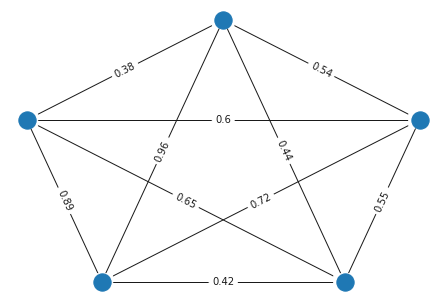

In [ ]:
def random_symmetric_matrix(n):
    np.random.seed(0)
    _R = np.random.uniform(0,1,n*(n-1)//2)
    P = np.zeros((n,n))
    P[np.triu_indices(n, 1)] = _R
    P[np.tril_indices(n, -1)] = P.T[np.tril_indices(n, -1)]
    return P



#Initialize graph using the adjacency matrix
def graph_initialization(adj_matrix,graph_type='undirected'):     #graph_type = 'directed','undirected'
  nodes = adj_matrix.shape[0]

  if graph_type == 'undirected':
    G = nx.Graph()
    angle = 2 * np.pi / nodes
    for i in range(1,nodes+1):
      G.add_node(i,pos=(5*np.sin(i * angle),5*np.cos(i * angle)))
    for i in range(1,nodes+1):
      for j in range(1,nodes+1):
        G.add_edge(i, j, weight=adj_matrix[i-1][j-1])
    print("--Graph Initialization complete--")
    print("Weight of each edge represents the infection rate")
    pos=nx.get_node_attributes(G,'pos')
    nx.draw(G,pos)  
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    fig_size=(6,6)
    plt.rcParams["figure.figsize"] = fig_size
    plt.show()

  elif graph_type == 'directed':
    G = nx.DiGraph()
    for i in range(0,nodes):
      for j in range(0,nodes):
        G.add_weighted_edges_from([(i,j,adj_matrix[i][j])])
  return G

A=random_symmetric_matrix(5)
# initialize the correct matrix A here
A=np.around(A,2)
model=graph_initialization(A,graph_type='undirected')


In [ ]:
def vector_to_diagonalmatrix(model,vector):
  nodes = np.array(model.nodes).size
  diag_matrix = np.zeros((nodes,nodes))
  for i in range(0,nodes):
    diag_matrix[i][i] = vector[i]
  return diag_matrix

In [ ]:
def get_eigenvalue(matrix):
  value = np.linalg.eigvals(matrix)
  return value

In [ ]:
def constraint_check(model,delta_vector,A):
  diag = vector_to_diagonalmatrix(model,delta_vector)
  eigenvalues = get_eigenvalue(A-diag)
  eigen_max = np.argmax(np.absolute(eigenvalues))
  lambda_max = np.real(eigenvalues[eigen_max])
  if lambda_max <= 0 and (delta_vector>=0).all() :
    return True
  else :
    return False

In [ ]:
#Initialize a feasible population
def population_initialization(model,population_size,A):
  i=0
  nodes = np.array(model.nodes).size
  population=list()
  np.random.seed(0)
  while i<population_size:  
    v = np.random.rand(nodes) #delta vector
    if constraint_check(model,v,A):
      population.append(v)
      i+=1
  return population
#np.array(population_initialization(model,10,A)).shape

In [ ]:
def crossover(x1,x2):
    crossover_fraction=0.9
    EPS=math.exp(-14)
    eta_c=1
    y1=np.empty((len(x1)),dtype=float)
    y2=np.empty((len(x1)),dtype=float)
    if(np.random.rand(1)<=crossover_fraction):
        for i in range(0,len(x1)):
            if(np.random.rand(1)<=0.5):
                if(x1[i]<x2[i]):
                    y1[i]=x1[i]
                    y2[i]=x2[i]
                else:
                    y1[i]=x2[i]
                    y2[i]=x1[i]
                if(abs(x1[i]-x2[i])>EPS):
                    ylow=0
                    yupp=1
                    u=np.random.rand(1)
                    #Calculation of 1st child
                    beta=1.0+(2.0*(y1[i]-ylow)/(y2[i]-y1[i]))
                    alpha=2.0-pow(beta,-(eta_c+1.0))
                    if(u<=(1.0/alpha)):
                        betaq=pow((u*alpha),(1.0/(eta_c+1.0)))
                    else:
                        betaq=pow((1.0/(2.0-u*alpha)),(1.0/(eta_c+1.0)))
                    y1[i]=0.5*((y1[i]+y2[i])-betaq*(y2[i]-y1[i]))
                    #Calculation of 2nd child
                    beta=1.0+(2.0*(yupp-y2[i])/(y2[i]-y1[i]))
                    alpha=2.0-pow(beta,-(eta_c+1.0))
                    if(u<=(1.0/alpha)):
                        betaq=pow((u*alpha),(1.0/(eta_c+1.0)))
                    else:
                        betaq=pow((1.0/(2.0-u*alpha)),(1.0/(eta_c+1.0)))
                    y2[i]=0.5*((y1[i]+y2[i])-betaq*(y2[i]-y1[i]))
                else:
                    y1[i]=x1[i]
                    y2[i]=x2[i]
            else:
                y1[i]=x1[i]
                y2[i]=x2[i]
    else:
        for i in range(0,len(x1)):
            y1[i]=x1[i]
            y2[i]=x2[i]
    return y1,y2

np.random.seed(1)
x1=np.random.rand(4)
x2=np.random.rand(4)
print(x1,x2)
crossover(x1,x2)


[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01] [0.14675589 0.09233859 0.18626021 0.34556073]


(array([0.417022  , 0.09847997, 0.00586368, 0.29738278]),
 array([ 0.14675589,  0.0659354 , -0.08343634,  0.29181825]))

In [ ]:
def fitness(population,cost):
  U = np.sum(np.multiply(delta_vector,cost),axis=1)
  return U


def selection(population,selection_size):
  selected_population = list()
  population_fitness = np.sum(np.multiply(cost,np.array(population)),axis=1)
  sort_index = population_fitness.argsort()[:selection_size]
  for i in sort_index:
    selected_population.append(population[i])
  return selected_population

In [ ]:
G=nx.read_graphml('/content/Bellsouth.graphml')

In [ ]:
G.nodes

NodeView(('n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n30', 'n31', 'n32', 'n33', 'n34', 'n35', 'n36', 'n37', 'n38', 'n39', 'n40', 'n41', 'n42', 'n43', 'n44', 'n45', 'n46', 'n47', 'n48', 'n49', 'n50'))

In [ ]:
A=nx.adjacency_matrix(G)

In [ ]:
A

<51x51 sparse matrix of type '<class 'numpy.longlong'>'
	with 66 stored elements in Compressed Sparse Row format>

In [ ]:
A.todense

<bound method spmatrix.todense of <51x51 sparse matrix of type '<class 'numpy.longlong'>'
	with 66 stored elements in Compressed Sparse Row format>>

In [ ]:
import scipy.sparse

In [ ]:
A.toarray

<bound method _cs_matrix.toarray of <51x51 sparse matrix of type '<class 'numpy.longlong'>'
	with 66 stored elements in Compressed Sparse Row format>>

In [ ]:
B=A.todense()

In [ ]:
 G = nx.from_numpy_matrix(B)

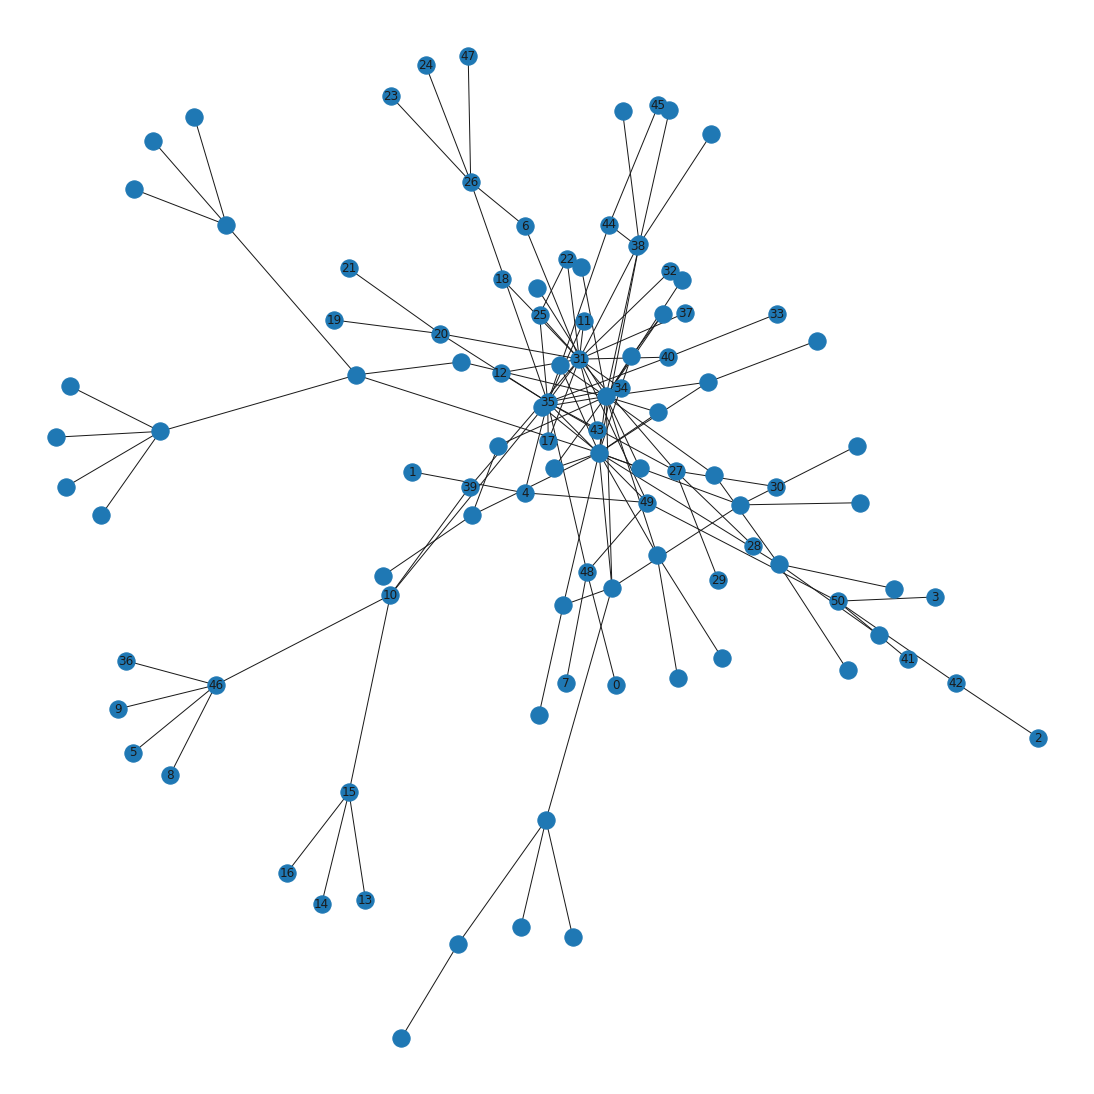

In [ ]:
nx.draw(G)
nx.drawing.nx_pylab.draw_networkx(G, pos=nx.spring_layout(G))  # use spring layout
labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
fig_size=(15,15)
plt.rcParams["figure.figsize"] = fig_size
plt.show()

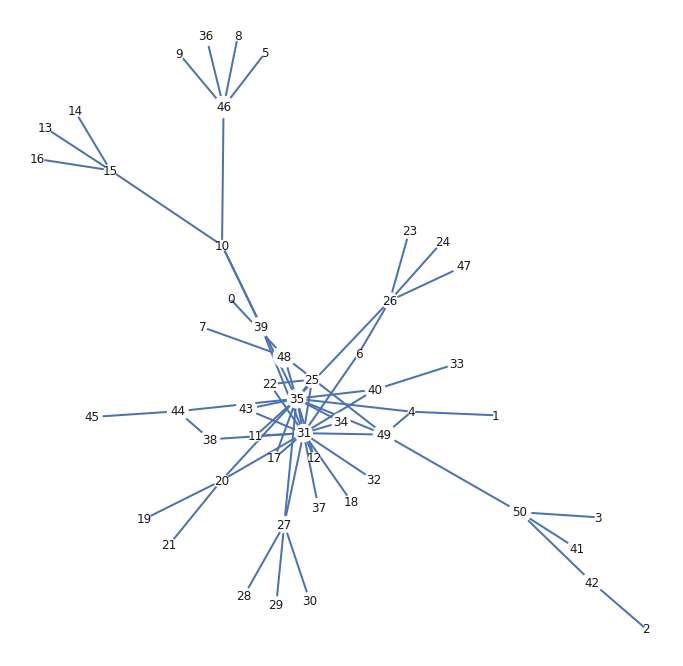

In [ ]:
import matplotlib as mpl

pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(100, M + 100)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
labels = nx.draw_networkx_labels(G, pos)
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='white')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color='b',
                               edge_cmap=plt.cm.Blues, width=2)

# set alpha value for each edge
#for i in range(M):
 #   edges[i].set_alpha(edge_alphas[i])
#edges.set_alpha(edge_alphas)

#pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
#pc.set_array(edge_colors)
#plt.colorbar(pc)
fig_size=(12,12)
plt.rcParams["figure.figsize"] = fig_size
ax = plt.gca()
ax.set_axis_off()
#ax.set_facecolor('red')
plt.show()


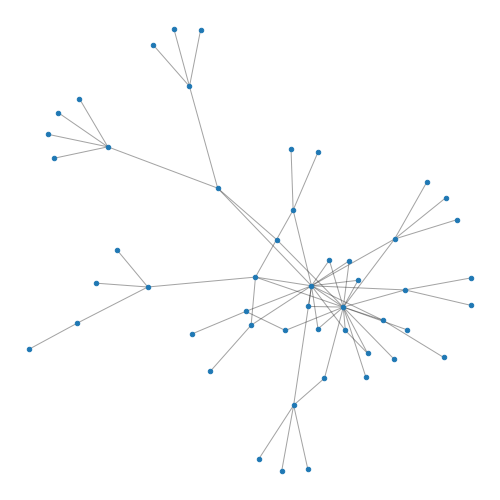

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt



degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# print "Degree sequence", degree_sequence
#dmax = max(degree_sequence)

#plt.loglog(degree_sequence, 'b-', marker='o')
#plt.title("Degree rank plot")
#plt.ylabel("degree")
#plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

plt.show()